In [1]:
import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

from a_type_model import ATypeModel
plt.style.use('default')

# Model Definition

In [3]:
model = ATypeModel(
    C_m=1,
    E_Na=50,
    E_K=-77,
    E_A=-80,
    E_L=-22,
    E_m=-73,
    g_Na=120,
    g_K=20,
    g_A=47.7,
    g_L=0.3
)

# Simulation
For the simulation a rectangle signal was used defined as

\begin{equation}
    I =
    \begin{cases}
        0,    & (t \lt t_e) \cup (t_s \le t) \\
        I_0,  & (t_e \le t \lt t_s)
    \end{cases}
\end{equation}

with $t_e = 60$ ms and $t_s = 460$ ms.

In [4]:
def rectangle_signal(f):
    def func(t):
        return f * np.heaviside(t - 60, 1) * np.heaviside(-t + 460, 1)
    return func

## Visualisation of spikes
In order to check if the model works the response to a set $I_0 \in \{5, 8.25, 12, 15\}$ $\mu$V was plotted. 

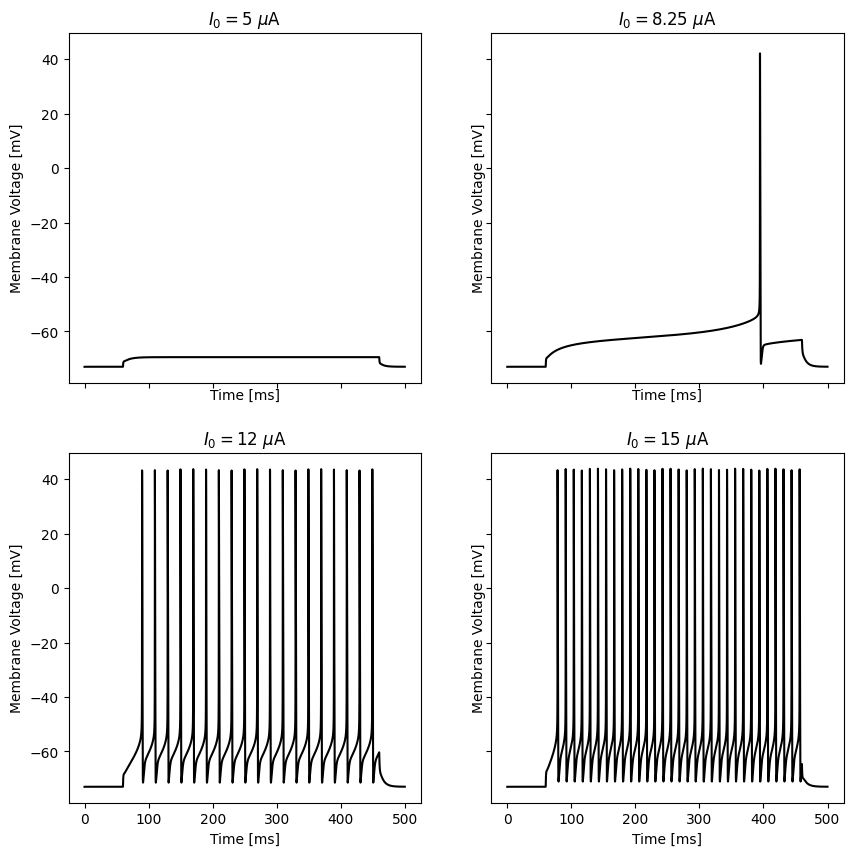

In [5]:
I_0s = [5, 8.25, 12, 15]

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axs = axs.flatten()

for I_0, ax in zip(I_0s, axs):
    ts, V, I, m, h, n, a, b = model.response(rectangle_signal(I_0), start=0, end=500)
    
    ax.plot(ts, V, 'k')
    ax.set_title(f'$I_0 = {I_0}$ $\mu$A')
    ax.set_ylabel('Membrane Voltage [mV]')
    ax.set_xlabel('Time [ms]')
plt.show()

## Spike Rate vs. $I_0$
The spike rate was calculated on a range from 5 to 20 $\mu$V with a step of 0.25 $\mu$V.
The firing rate was calculated by finding the number of points in time were the value (normalized to have $E_m = 0$) was equal to 50 and had an positive first derivative.
The resulting plot resembles a Linear Threshold Function commonly called the Rectifier Linear Unit, which is commonly used in artificial neural networks.

In [6]:
spikes = []

I_0s = np.arange(5, 20, 0.25)
end = 500
threshold = 50

for I_0 in I_0s:
    ts, V, I, m, h, n, a, b = model.response(rectangle_signal(I_0), start=0, end=end)

    V = V - model.E_m

    V[V < threshold] = 0
    V[V >= threshold] = 1
    
    dV = np.diff(V)

    spike_count = len(np.where(dV > 0)[0])
    spike_freq = spike_count / end * 1e3

    spikes.append(spike_freq)

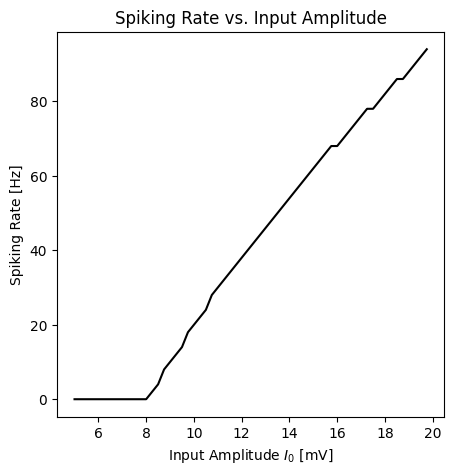

In [7]:
plt.style.use('default')

spikes = np.array(spikes)

plt.figure(figsize=(5, 5))
plt.plot(I_0s, spikes, 'k')
plt.title('Spiking Rate vs. Input Amplitude')
plt.xlabel('Input Amplitude $I_0$ [mV]')
plt.ylabel('Spiking Rate [Hz]')
plt.show()
